In [1]:
                                      #### “Bankruptcy Prevention – Exploratory Data Analysis (EDA)” ####
# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore") 

In [2]:
##Instal Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load dataset 
df = pd.read_excel("Bankruptcy (2).xlsx") 
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
#To Show All Columns
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [4]:
#To Show Shape Of The Data Sheet 
print("Shape:", df.shape)

Shape: (250, 7)


In [5]:
#To Display to Top 5 Row 
display(df.head(5))

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [6]:
#To Show Type of The Data
print(df.dtypes)

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object


In [7]:
#To Show Missing values per column:
print(df.isnull().sum())

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [8]:
#To Add feature list
features = ['industrial_risk', 'management_risk', 'financial_flexibility','credibility', 'competitiveness', 'operating_risk']

In [9]:
# To Show Target encoding (bankruptcy:-1 , non-bankruptcy:-0)
df['class_encoded'] = df['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

In [10]:
#To Show Target distribution Of Class
print(df['class'].value_counts())

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64


In [11]:
#To Show Target distribution in Classin Percentage:
print((df['class'].value_counts(normalize=True)*100).round(2))

class
non-bankruptcy    57.2
bankruptcy        42.8
Name: proportion, dtype: float64


In [12]:
# Tho Display Numeric Summary Statistics
display(df[features].describe().T)

,count,mean,std,min,25%,50%,75%,max
industrial_risk,250.0,0.518,0.411526,0.0,0.0,0.5,1.0,1.0
management_risk,250.0,0.614,0.410705,0.0,0.5,0.5,1.0,1.0
financial_flexibility,250.0,0.376,0.401583,0.0,0.0,0.5,0.5,1.0
credibility,250.0,0.470,0.415682,0.0,0.0,0.5,1.0,1.0
competitiveness,250.0,0.476,0.440682,0.0,0.0,0.5,1.0,1.0
operating_risk,250.0,0.570,0.434575,0.0,0.0,0.5,1.0,1.0


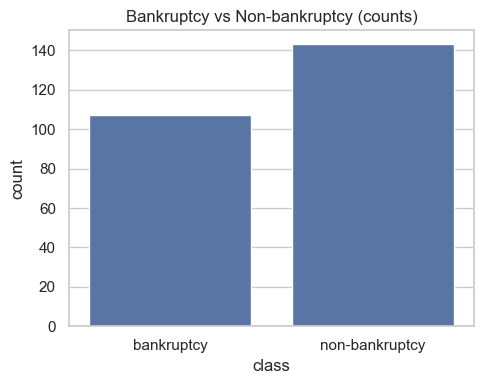

In [13]:
# To Show Visualizations of Bankruptcy vs Non-bankruptcy In Bar Chat
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df)
plt.title('Bankruptcy vs Non-bankruptcy (counts)')
plt.tight_layout()
plt.show()

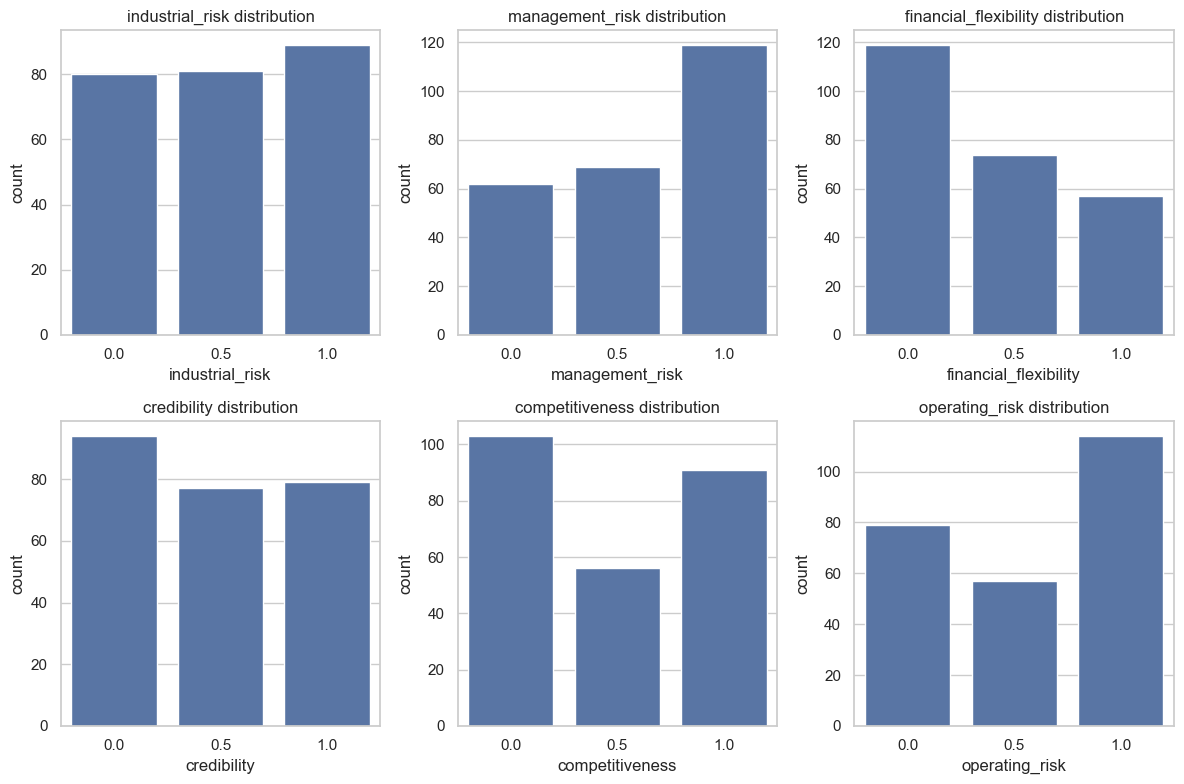

In [14]:
#It will show a 2×3 grid of bar plots, each plot showing how many companies have each value (0, 0.5, 1) for each feature.
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for ax, col in zip(axes.flat, features):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f"{col} distribution")
plt.tight_layout()
plt.show()

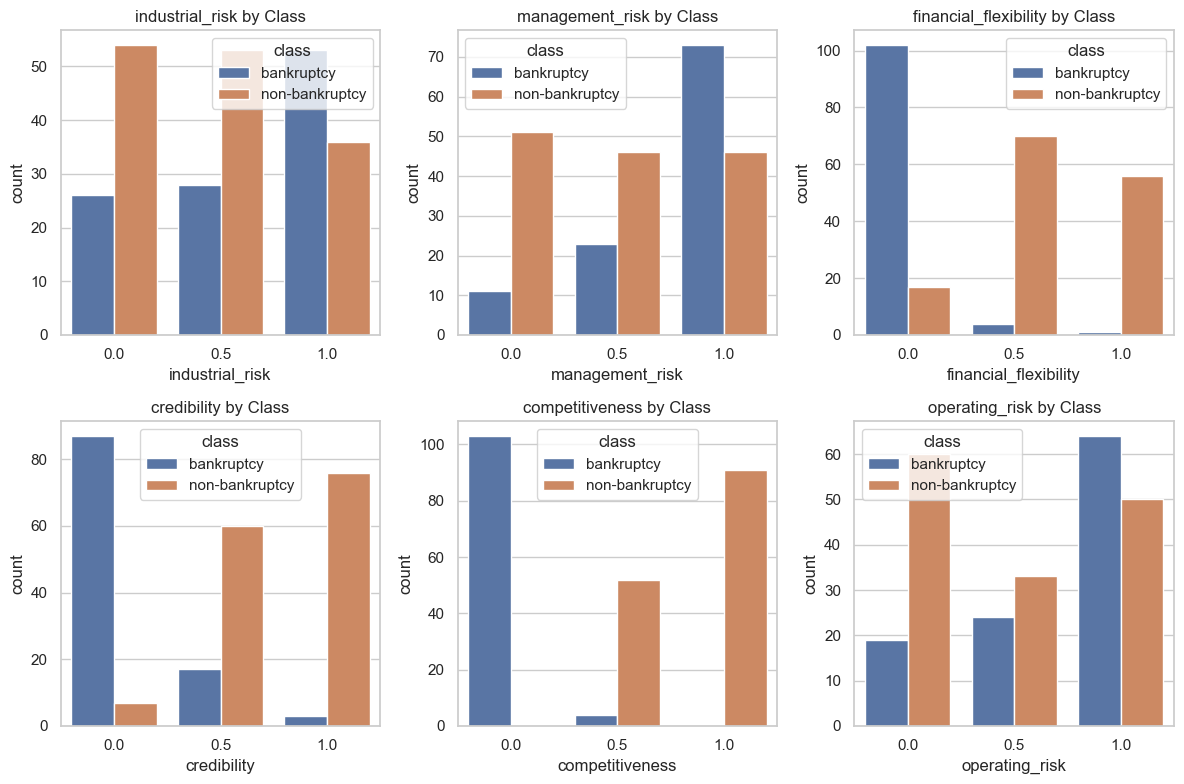

In [15]:
# This graph shows how each feature (industrial_risk, management_risk, etc.) is distributed 
# across the two classes ('bankruptcy' vs 'non-bankruptcy'), highlighting patterns or differences between them.
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for ax, col in zip(axes.flat, features):
    sns.countplot(x=col, hue='class', data=df, ax=ax)
    ax.set_title(f"{col} by Class")
plt.tight_layout()
plt.show()

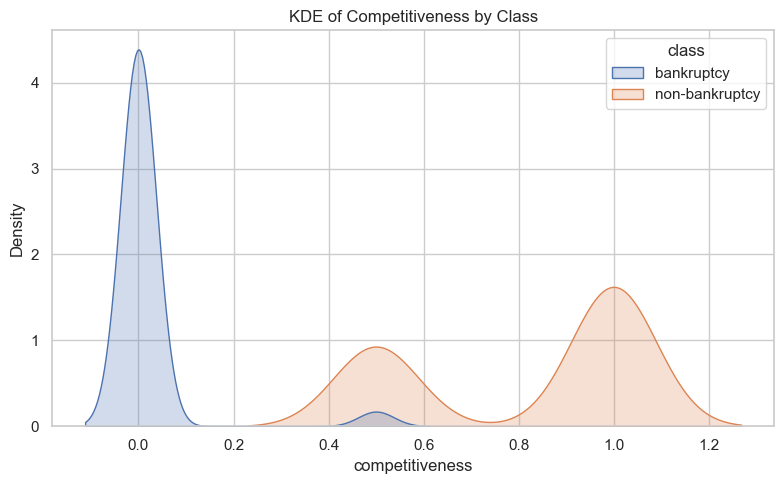

In [16]:
# This KDE plot visualizes the density distribution of the 'competitiveness' feature 
# for bankruptcy vs non-bankruptcy companies, showing where each class is concentrated.
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='competitiveness', hue='class', fill=True)
plt.title('KDE of Competitiveness by Class')
plt.tight_layout()
plt.show()

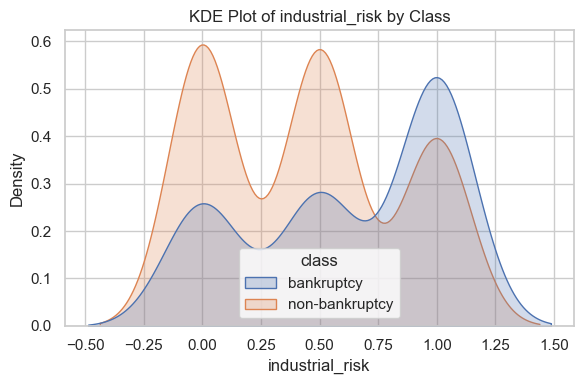

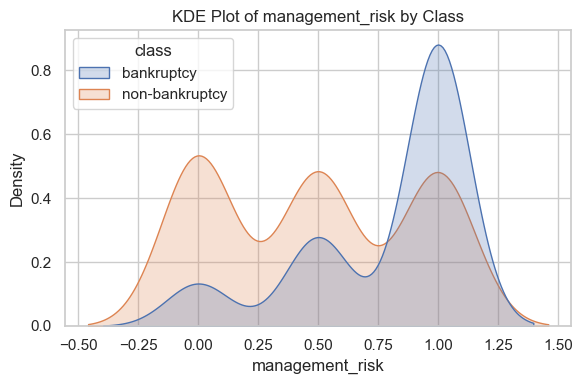

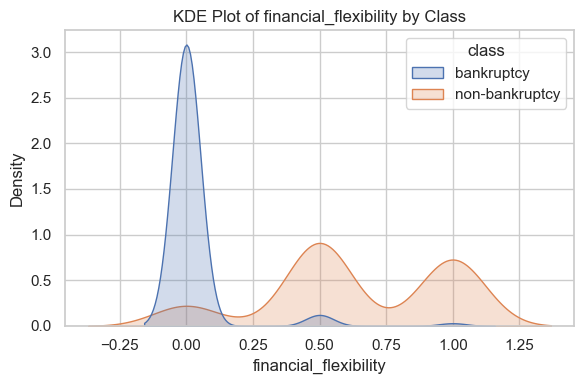

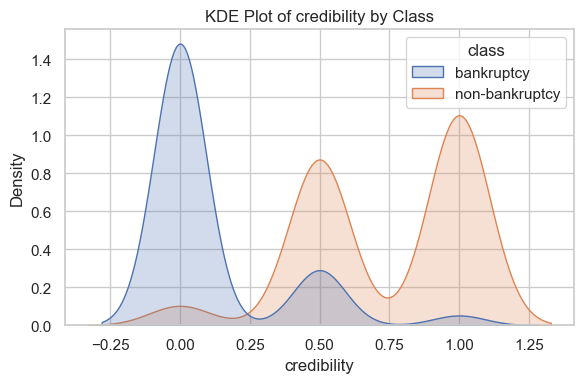

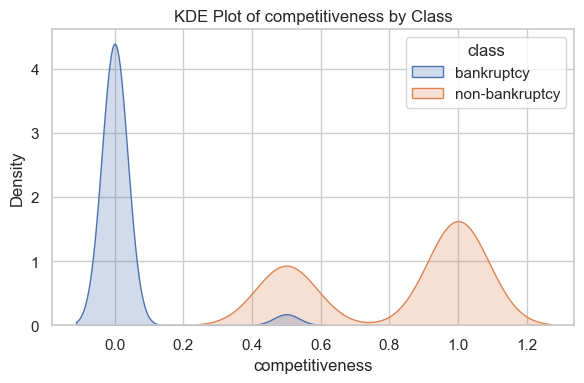

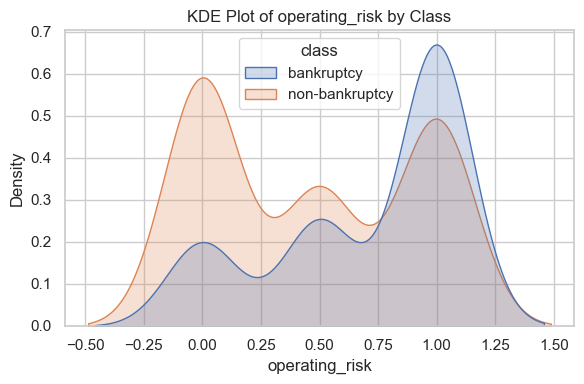

In [17]:
# These KDE plots show the distribution of each feature for bankruptcy vs non-bankruptcy companies, 
# helping to identify which features separate the classes most clearly.
for col in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='class', fill=True)
    plt.title(f"KDE Plot of {col} by Class")
    plt.tight_layout()
    plt.show()

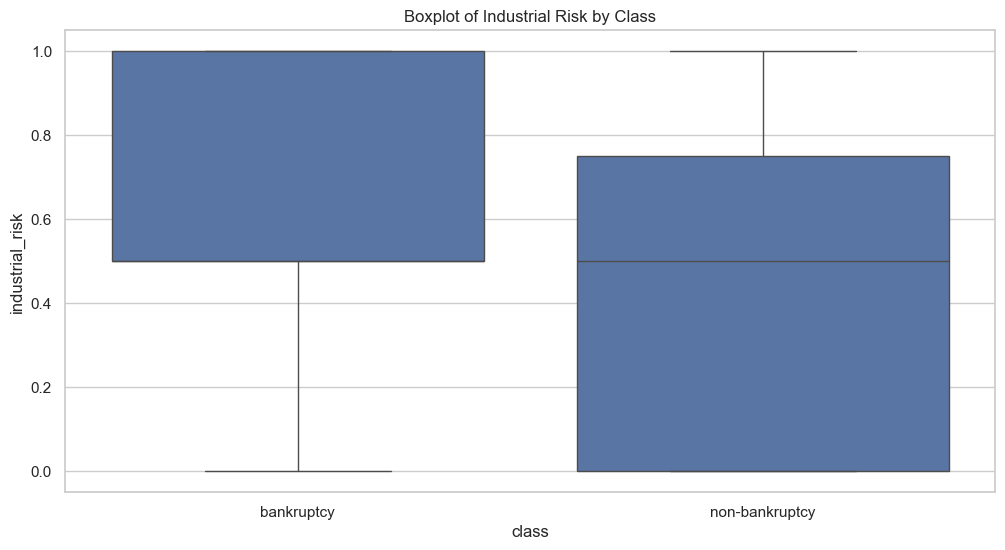

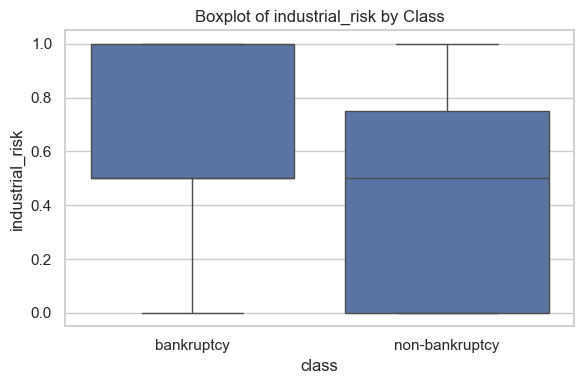

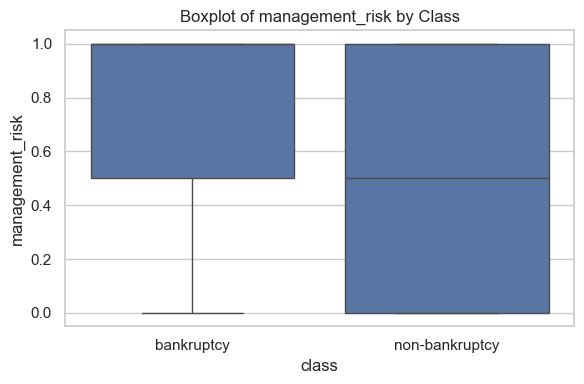

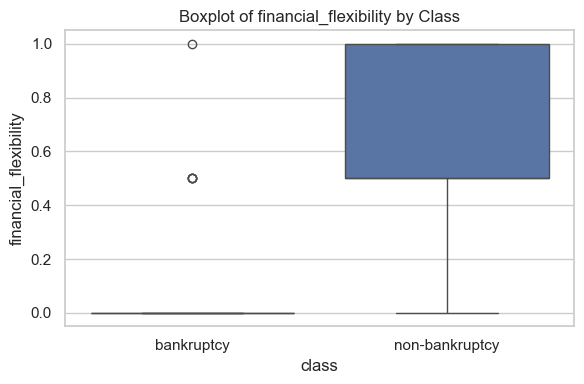

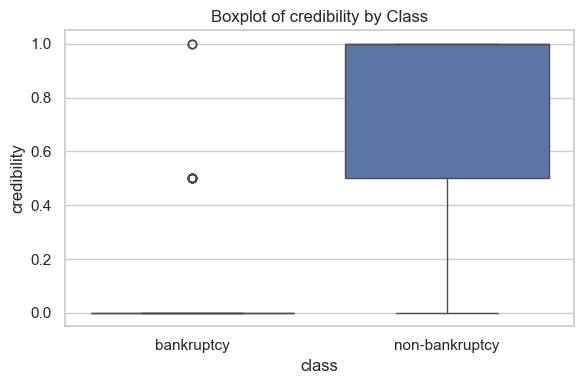

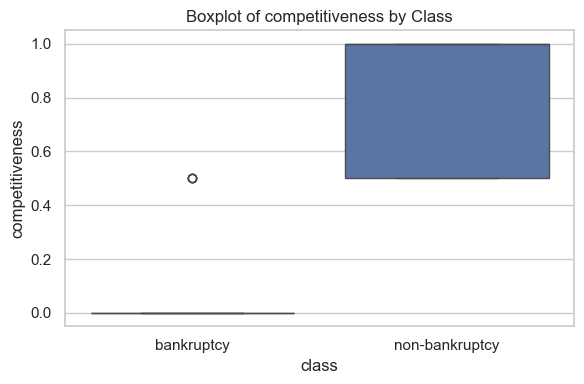

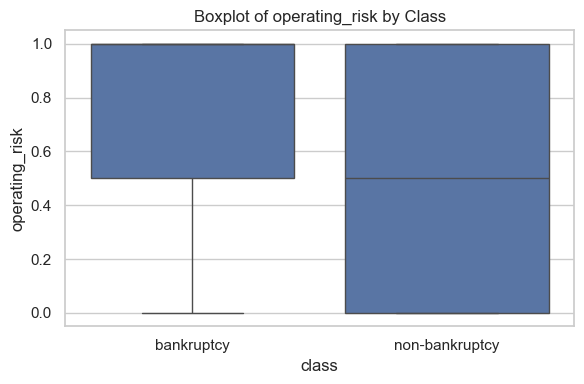

In [18]:
#Boxplot of Industrial Risk by Class
# The boxplots show the spread and central tendency of each feature for bankruptcy vs non-bankruptcy companies, 
# highlighting differences between classes and potential outliers in the data.
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='class', y='industrial_risk')
plt.title("Boxplot of Industrial Risk by Class")
plt.show()

# If you want all features in one loop
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f"Boxplot of {col} by Class")
    plt.tight_layout()
    plt.show()

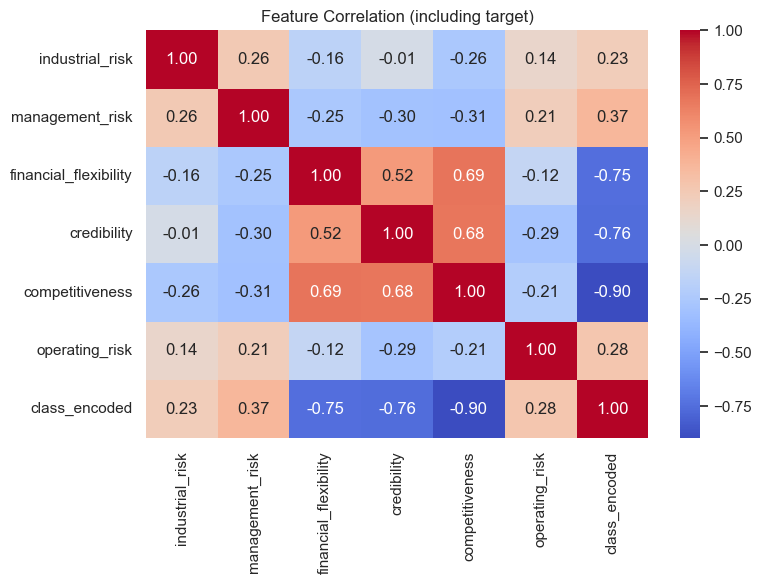

In [19]:
#Feature Correlation (including target)
#The heatmap visualizes the correlation coefficients between all features and the target, 
# showing which features are positively or negatively associated with bankruptcy or non-bankruptcy.
numeric_df = df[features + ['class_encoded']]
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation (including target)")
plt.tight_layout()
plt.show()

In [20]:
#Correlation of features with target:
# The printed correlation values show how strongly each feature is linearly related to the target, 
# helping identify the most influential predictors for bankruptcy vs non-bankruptcy.
print("Correlation of features with target:")
print(corr['class_encoded'].sort_values(ascending=False))

Correlation of features with target:
class_encoded            1.000000
management_risk          0.370838
operating_risk           0.279786
industrial_risk          0.227823
financial_flexibility   -0.751020
credibility             -0.755909
competitiveness         -0.899452
Name: class_encoded, dtype: float64


In [21]:
#Variance Inflation Factor (VIF)
# The VIF table measures multicollinearity between features; 
# high VIF (>5 or 10) indicates a feature is highly correlated with others and may cause redundancy in models.
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[features].astype(float).copy()
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
})

In [22]:
#To Show VIF (Variance Inflation Factor)
print("VIF (Variance Inflation Factor)")
display(vif_data.sort_values('VIF', ascending=False))

VIF (Variance Inflation Factor)


,feature,VIF
4,competitiveness,5.710254
3,credibility,4.571150
2,financial_flexibility,3.615472
1,management_risk,2.898836
0,industrial_risk,2.861285
5,operating_risk,2.523834


In [23]:
# Chi-Squared test
# The Chi-Squared test results show how strongly each categorical feature is associated with the target class, 
# with higher Chi2 values and low p-values indicating a significant relationship with bankruptcy vs non-bankruptcy.
from sklearn.feature_selection import chi2
X_chi = (df[features] * 2).astype(int)
y_chi = df['class_encoded'].astype(int)
chi_scores = chi2(X_chi, y_chi)
chi2_results = pd.DataFrame({
    'Feature': features,
    'Chi2 Statistic': chi_scores[0],
    'p-value': chi_scores[1]
}).sort_values('Chi2 Statistic', ascending=False)
print("Chi-Squared test results")
display(chi2_results)

Chi-Squared test results


,Feature,Chi2 Statistic,p-value
4,competitiveness,164.372504,1.254257e-37
2,financial_flexibility,120.474484,4.980325e-28
3,credibility,104.614502,1.483669e-24
1,management_risk,18.814380,1.440767e-05
5,operating_risk,12.916258,3.257404e-04
0,industrial_risk,8.450597,3.649237e-03


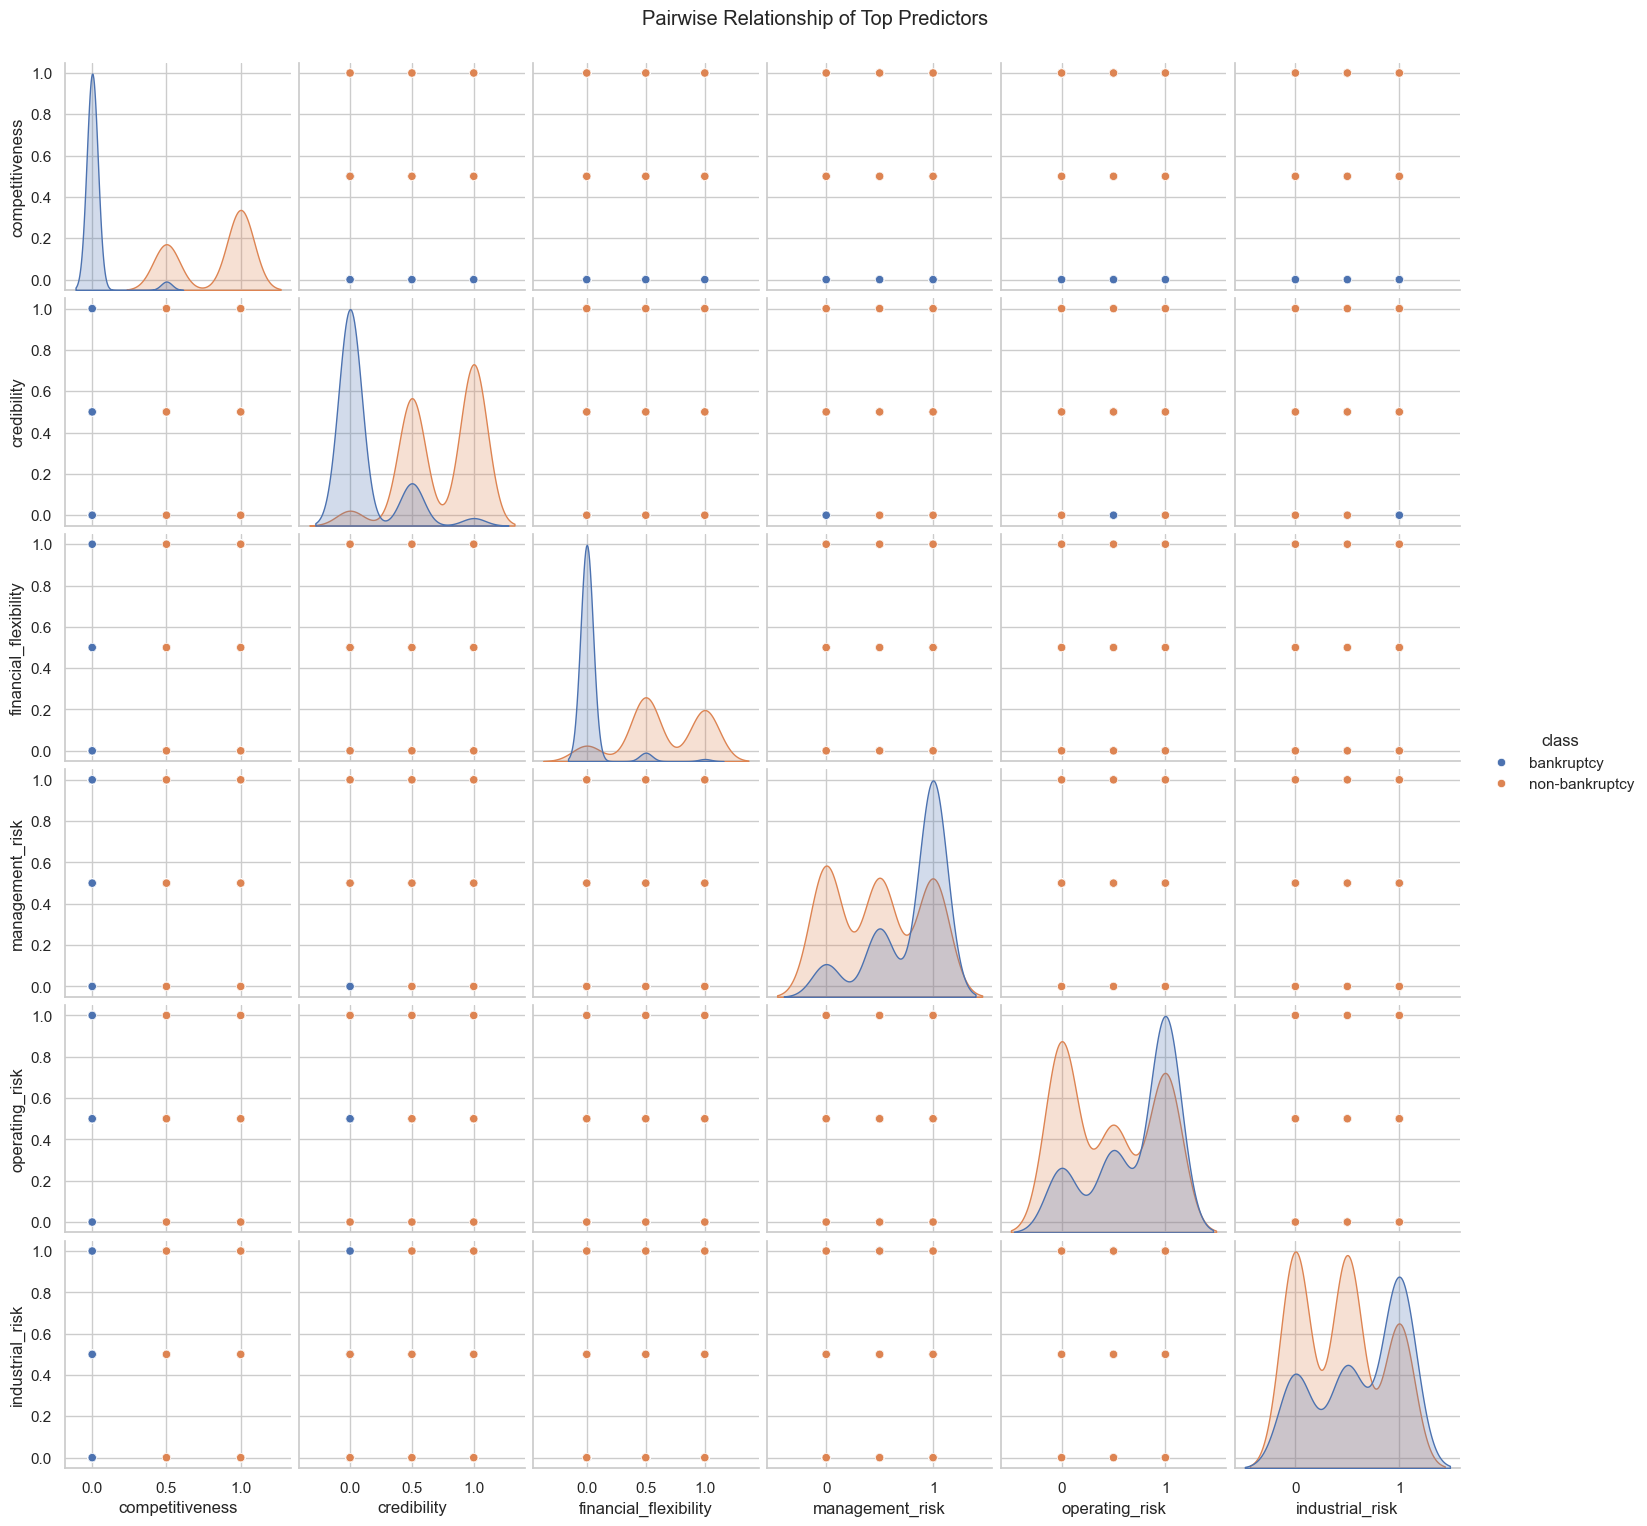

()

In [24]:
###Pairwise Relationship of Top Predictors
# Pairplot shows scatterplots and distributions for the top 6 features most correlated with the target, 
# allowing us to see both individual feature distributions and pairwise relationships between features by class.
top_corr = corr['class_encoded'].drop('class_encoded').abs().sort_values(ascending=False)
top_features = top_corr.head(6).index.tolist()
# Pairplot of these features
sns.pairplot(df[top_features + ['class']], hue='class', )#corner=True)
plt.suptitle("Pairwise Relationship of Top Predictors", y=1.02)
plt.show()
()

In [25]:
#Outlier & Distribution Summary
# It provides a quick way to assess which features may be skewed, have extreme values, or require transformation before modeling.
from scipy.stats import skew, kurtosis
print("Outlier & Distribution Summary")
dist_summary = []
for col in features:
    dist_summary.append({
        'Feature': col,
        'Skewness': round(skew(df[col]), 3),
        'Kurtosis': round(kurtosis(df[col]), 3),
        'Unique Values': df[col].nunique(),
        'Most Frequent': df[col].mode()[0],
        'Outlier Count (IQR)': ((df[col] > (df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25)))) |
                                (df[col] < (df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))))).sum()
    })
dist_summary_df = pd.DataFrame(dist_summary)
display(dist_summary_df)

Outlier & Distribution Summary


,Feature,Skewness,Kurtosis,Unique Values,Most Frequent,Outlier Count (IQR)
0,industrial_risk,-0.067,-1.515,3,1.0,0
1,management_risk,-0.442,-1.375,3,1.0,0
2,financial_flexibility,0.476,-1.289,3,0.0,0
3,credibility,0.112,-1.539,3,0.0,0
4,competitiveness,0.093,-1.701,3,0.0,0
5,operating_risk,-0.274,-1.616,3,1.0,0


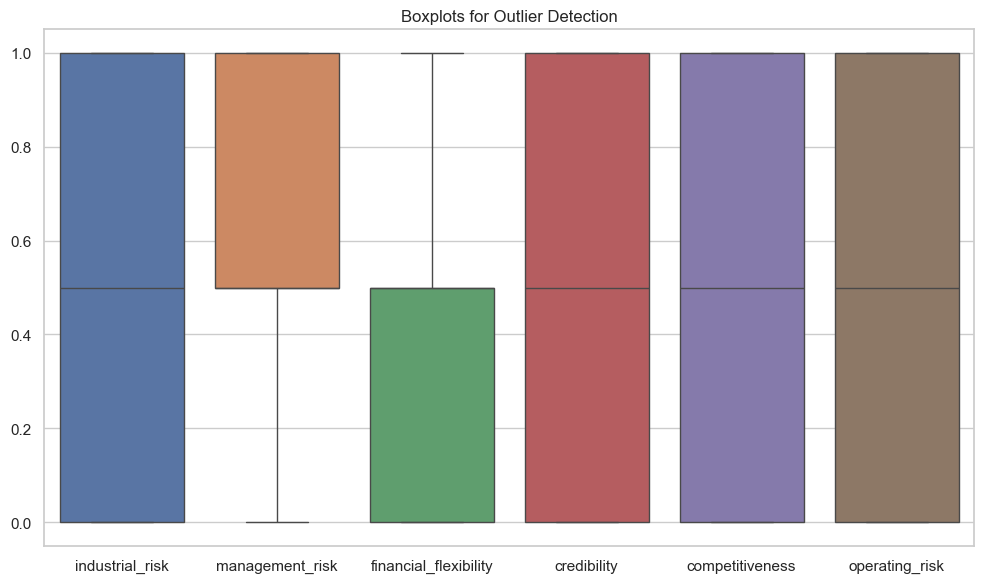

In [26]:
##Boxplots for Outlier Detection
# The combined boxplots for all features provide a quick overview of the distributions, 
# allowing us to detect outliers, skewness, and variability across all features simultaneously.
plt.figure(figsize=(10,6))
sns.boxplot(data=df[features])
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

Logistic Regression Feature Importance


,Feature,Coefficient,Abs_Coefficient
4,competitiveness,-2.896807,2.896807
2,financial_flexibility,-1.547481,1.547481
3,credibility,-1.464529,1.464529
1,management_risk,0.396108,0.396108
0,industrial_risk,0.375988,0.375988
5,operating_risk,0.147424,0.147424


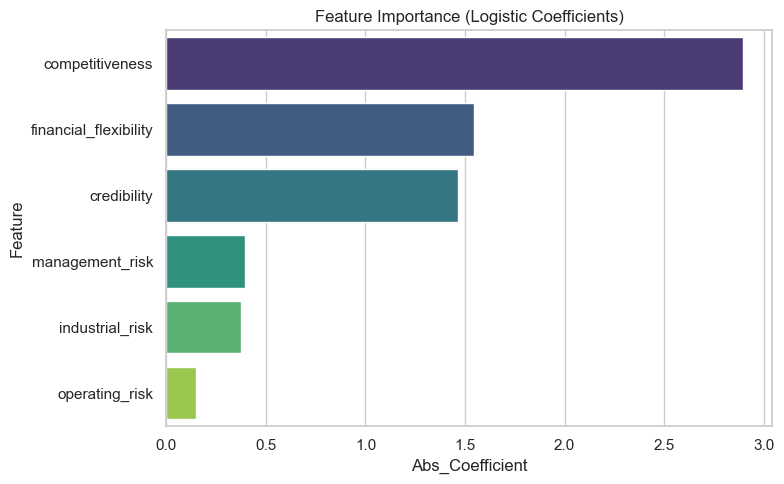

In [27]:
                           #### “Bankruptcy Prevention –  Model Buliding” ####
# This code splits the dataset into training (80%) and testing (20%) sets while preserving the class distribution using stratification, 
# preparing the data for model training and evaluation.
# The print statements display the number of samples in each set, helping to confirm that the split was done correctly.
#Feature Importance using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X = df[features]
y = df['class_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Logistic Regression Feature Importance")
display(importance_df)

plt.figure(figsize=(8,5))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (Logistic Coefficients)")
plt.tight_layout()
plt.show()

In [28]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples : {X_test.shape[0]}")

Training samples: 200
Testing samples : 50


Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



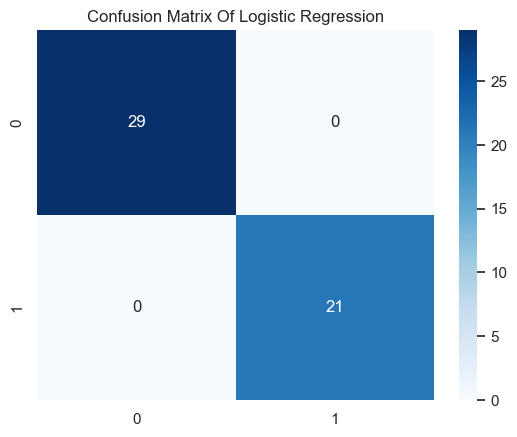

In [29]:
#Logistic Regression Model Evaluation
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve,auc)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Of Logistic Regression")
plt.show()

In [30]:
#Decision Tree Classifier
# A simple and interpretable model that splits data based on feature thresholds.
# We use it to understand feature-level decision paths and identify important predictors of bankruptcy.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



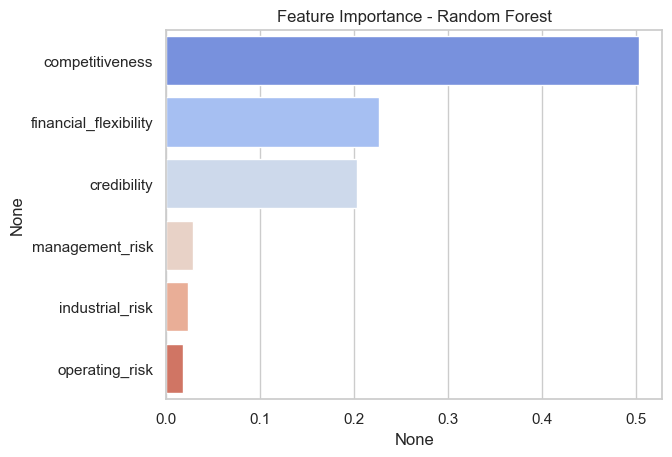

In [31]:
#Random Forest Classifier
# An ensemble of multiple decision trees that improves prediction stability and accuracy.
# We use it to reduce overfitting and check if combining trees gives better performance than a single tree.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

# Feature Importance
# Shows which features the Random Forest model considers most influential in predicting bankruptcy.
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, palette='coolwarm')
plt.title("Feature Importance - Random Forest")
plt.show()

In [32]:
#Support Vector Machine (SVM)
# A powerful model that separates classes using the optimal hyperplane.
# We use it to test how well a margin-based classifier can distinguish bankruptcy vs. non-bankruptcy.
from sklearn.svm import SVC

model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [33]:
# K-Nearest Neighbors (KNN)
# A distance-based algorithm that classifies data based on neighboring samples.
# We use it to test how instance-based learning performs compared to tree or margin-based models.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Accuracy: 0.98
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



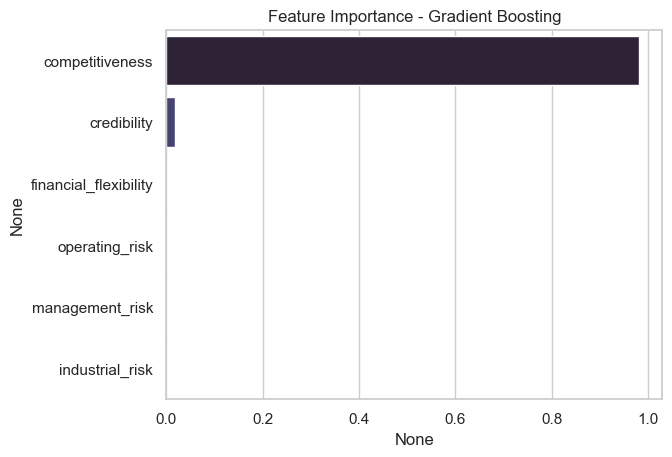

In [34]:
# Gradient Boosting Classifier
# A boosting algorithm that builds models sequentially, correcting previous errors.
# We use it to check if boosting weak learners can outperform Random Forest in accuracy and AUC.
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
# Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, palette='mako')
plt.title("Feature Importance - Gradient Boosting")
plt.show()

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



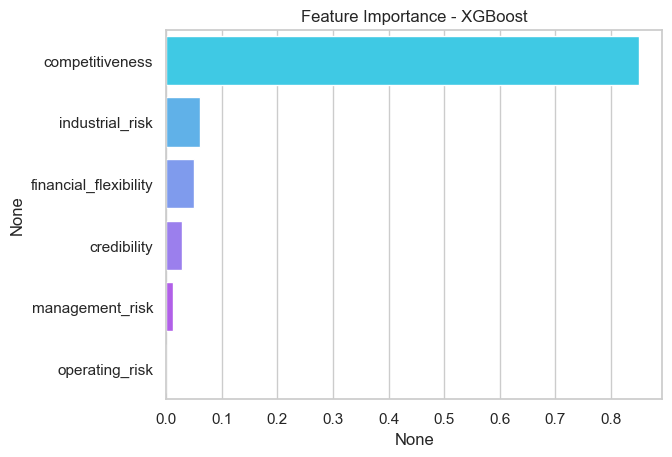

In [35]:
#XGBoost Classifier (Extreme Gradient Boosting)
# An optimized boosting algorithm known for high speed and performance.
# We use it to achieve potentially higher accuracy and faster training compared to other ensemble methods.

from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

#Feature Importance - XGBoost
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, palette='cool')
plt.title("Feature Importance - XGBoost")
plt.show()

In [36]:
# Model Comparison Chart
# After training all models, we compare their accuracy to find the best performer.
# If you ran all models, store their accuracies manually
# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [37]:
from sklearn.model_selection import cross_val_score

results = []
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    cv = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    cm = confusion_matrix(y_test, y_pred)

    roc_auc = auc(*roc_curve(y_test, y_proba)[:2]) if y_proba is not None else None

    print(f"Accuracy: {acc:.4f} | CV Score: {cv:.4f} | AUC: {roc_auc:.4f}" if roc_auc else f"Accuracy: {acc:.4f} | CV Score: {cv:.4f}")
    results.append({
        'Model': name,
        'Accuracy': acc,
        'CV Score': cv,
        'AUC': roc_auc
    })

Training Logistic Regression
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000
Training Decision Tree
Accuracy: 0.9800 | CV Score: 0.9920 | AUC: 0.9828
Training Random Forest
Accuracy: 1.0000 | CV Score: 1.0000 | AUC: 1.0000
Training SVM
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000
Training KNN
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000
Training Gradient Boosting
Accuracy: 0.9800 | CV Score: 0.9800 | AUC: 0.9828
Training XGBoost
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000


In [38]:
# Model Comparison DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("Model Comparison:")
print(results_df)

Model Comparison:
                 Model  Accuracy  CV Score       AUC
0  Logistic Regression      1.00     0.996  1.000000
2        Random Forest      1.00     1.000  1.000000
3                  SVM      1.00     0.996  1.000000
4                  KNN      1.00     0.996  1.000000
6              XGBoost      1.00     0.996  1.000000
1        Decision Tree      0.98     0.992  0.982759
5    Gradient Boosting      0.98     0.980  0.982759


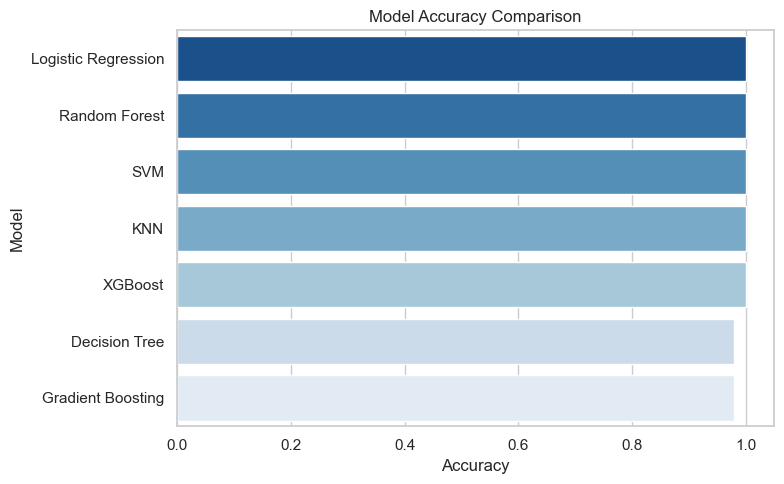

In [39]:
#Visualize Model Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='Blues_r')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

Best Performing Model: Logistic Regression
Classification Report of best model (Logistic Regression):
                precision    recall  f1-score   support

Non-Bankruptcy       1.00      1.00      1.00        29
    Bankruptcy       1.00      1.00      1.00        21

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



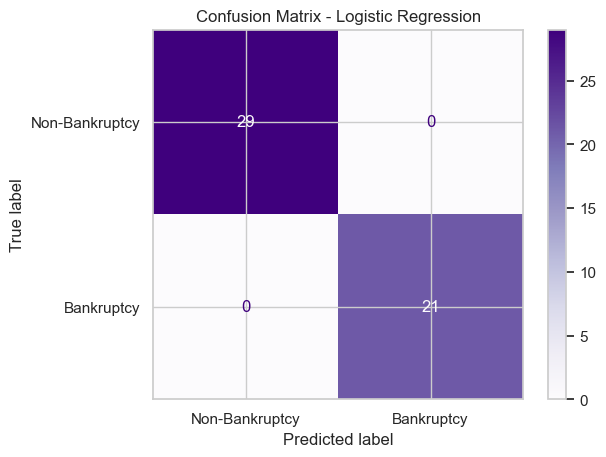

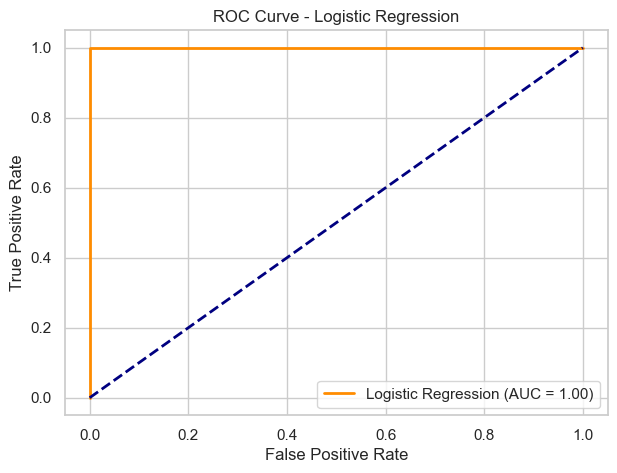

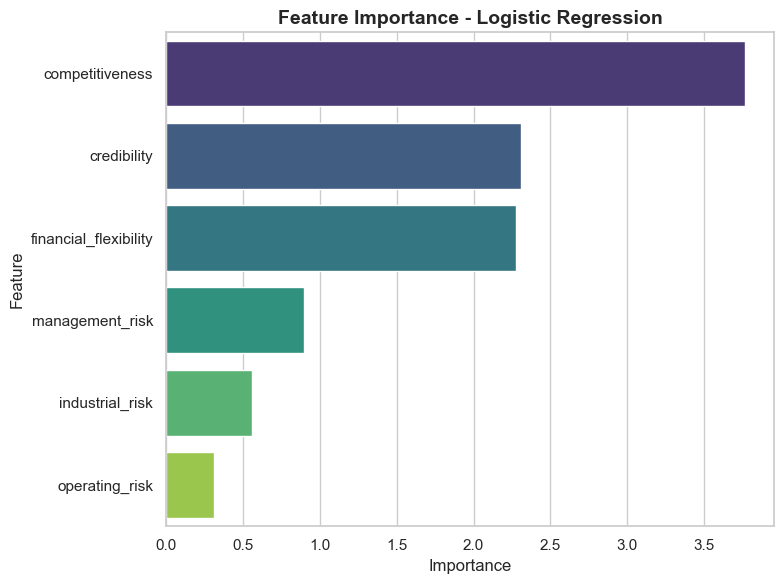

In [40]:
#Best Model Selection
best_model_name = results_df.iloc[0]['Model']
print(f"Best Performing Model: {best_model_name}")
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

# Classification Report of Best Model
print(f"Classification Report of best model ({best_model_name}):")
print(classification_report(y_test, y_pred_best, target_names=["Non-Bankruptcy", "Bankruptcy"]))

#Confusion Matrix (Best Model)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Bankruptcy", "Bankruptcy"])
disp.plot(cmap='Purples')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()
 
#ROC Curve (Best Model)

if y_pred_proba_best is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.show()
#Feature Importance 
# Tree-based models (RandomForest, DecisionTree, GradientBoosting, XGBoost)
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
# Linear models (Logistic Regression, SVM with linear kernel)
elif hasattr(best_model, "coef_"):
    importances = np.abs(best_model.coef_[0])
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

# Plot only if importance data is available
if importance_df is not None:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()

In [41]:
#Final Summary
print("Model Summary:")
for i, row in results_df.iterrows():
    print(f"{row['Model']:<20} | Accuracy: {row['Accuracy']:.4f} | CV: {row['CV Score']:.4f} | AUC: {row['AUC']:.4f}")

Model Summary:
Logistic Regression  | Accuracy: 1.0000 | CV: 0.9960 | AUC: 1.0000
Random Forest        | Accuracy: 1.0000 | CV: 1.0000 | AUC: 1.0000
SVM                  | Accuracy: 1.0000 | CV: 0.9960 | AUC: 1.0000
KNN                  | Accuracy: 1.0000 | CV: 0.9960 | AUC: 1.0000
XGBoost              | Accuracy: 1.0000 | CV: 0.9960 | AUC: 1.0000
Decision Tree        | Accuracy: 0.9800 | CV: 0.9920 | AUC: 0.9828
Gradient Boosting    | Accuracy: 0.9800 | CV: 0.9800 | AUC: 0.9828


In [42]:
                        ####Model Tuning & Optimization####
#To improve model performance by adjusting hyperparameters and reducing overfitting or underfitting.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 1.0


In [43]:
!pip install shap

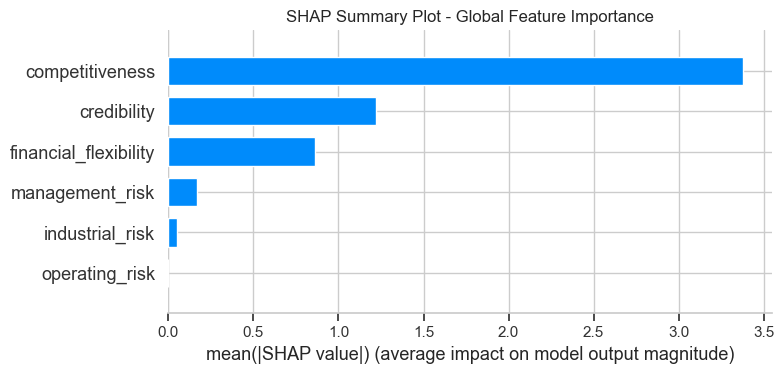

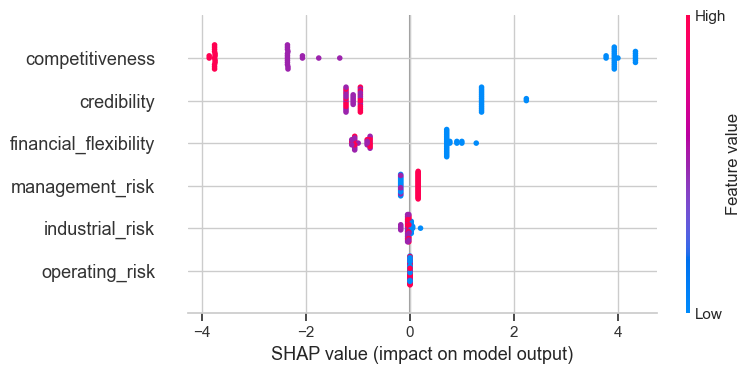

In [44]:
                  ###Model Interpretation###
#To understand why The model makes certain predictions — especially important for business and domain understanding.

#LINE 1 - SHAP library, which is used for model interpretability.
#It helps you understand your trained model — not just what it predicts, but why it predicts that way.
#LINE 2 - Creating a SHAP explainer object for your trained model.
#TreeExplainer is specifically designed for tree-based models (like Random Forest, XGBoost, Gradient Boosting, Decision Tree).
#This explainer learns how the model makes predictions internally.
#LINE 3 - Calculates SHAP values for each feature in your test data.
#How much a specific feature increased or decreased the prediction for a given instance (company).
#LINE 4 - Creates a visual summary of feature importance and direction.
#The x-axis = SHAP value (impact on prediction).
#The color = feature value (high or low).
#Each dot = one observation (company).
#Features are sorted by importance (top = most important).
#The plot visually tells you which features matter the most and how they affect bankruptcy outcome
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Shows the overall strength of each feature's impact on predictions
plt.title("SHAP Summary Plot - Global Feature Importance")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
plt.show()

# Visualizes how high or low values of features influence predictions
shap.summary_plot(shap_values, X_test)

In [45]:
####Model Saving
#To save your trained model so you can reuse it without retraining every time
import pickle

with open("Bankruptcy_Model_amit.pkl", "wb") as f:
    pickle.dump(model, f)